In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:/Users/User/Downloads/loan_dataset.csv')
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [3]:
data.shape

(116058, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [5]:
data.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [6]:
data.isnull()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [8]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [9]:
data['borrower_credit_score'].unique()

array([694., 697., 780., 633., 681., 675., 723., 652., 808., 702., 738.,
       742., 739., 757., 687., 731., 699., 669., 711., 640., 621., 746.,
       667., 779., 807., 683., 776., 747., 630., 661., 759., 650., 686.,
       741., 802., 726., 801., 627., 648., 641., 692., 678., 789., 758.,
       679., 740., 729., 733., 626., 790., 778., 787., 714., 783., 795.,
       672., 771., 764., 784., 685., 684., 654., 775., 727., 712., 761.,
       691., 701., 773., 716., 777., 753., 689., 696., 709., 760., 668.,
       635., 703., 677., 743., 786., 768., 665., 639., 717., 637., 809.,
       674., 676., 756., 737., 806., 700., 763., 659., 707., 730., 719.,
       798., 673., 643., 645., 666., 663., 657., 658., 660., 744., 680.,
       811., 813., 804., 734., 728., 705., 770., 749., 794., 793., 785.,
       664., 754., 721., 646., 755., 688., 655., 769., 799., 810., 708.,
       821., 796., 670., 788., 745., 629., 698., 765., 624., 682., 695.,
       750., 735., 706., 690., 767., 766., 815., 77

In [10]:
data['borrower_credit_score'].value_counts()

801.0    2271
809.0    2246
802.0    2067
808.0    2024
791.0    1958
         ... 
840.0       1
838.0       1
559.0       1
619.0       1
831.0       1
Name: borrower_credit_score, Length: 221, dtype: int64

In [11]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [12]:
data.tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0
116057,763308490661,Z,Thornton-Davis,3.375,252000,180,2012-01-01,03/2012,29,2.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.iloc[100:112]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
100,317482012746,X,OTHER,3.375,110000,120,2012-02-01,04/2012,54,2.0,...,0,0,0,0,0,0,1,0,1,1
101,998714392459,Z,"Miller, Mcclure and Allen",4.375,221000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,1,2,3,4,5,6,1
102,624602831355,Y,Edwards-Hoffman,4.375,135000,360,2012-01-01,03/2012,60,1.0,...,0,0,0,0,0,0,0,0,0,1
103,269996072825,X,OTHER,4.000,80000,360,2012-01-01,03/2012,55,1.0,...,0,0,0,1,2,3,4,5,6,1
104,735959226225,X,Browning-Hart,3.375,103000,180,2012-01-01,03/2012,80,1.0,...,2,2,2,2,2,2,2,2,2,1
105,623110719151,Y,OTHER,4.375,160000,360,2012-01-01,03/2012,73,1.0,...,0,0,0,0,0,0,0,0,0,1
106,499650017443,X,Browning-Hart,4.375,157000,360,2012-02-01,04/2012,62,2.0,...,4,5,6,7,0,1,2,2,1,1
107,412553101415,Z,OTHER,3.500,244000,180,2012-01-01,03/2012,88,1.0,...,0,0,0,1,0,0,0,0,1,1
108,531374590249,X,Edwards-Hoffman,3.928,91000,360,2012-02-01,03/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
109,157639850869,Y,OTHER,4.375,141000,360,2012-02-01,04/2012,30,1.0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [15]:
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_2404\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,1.000000,-0.000902,0.005385,-0.001277,0.000761,0.001739,0.003894,0.001230,0.000948,0.001919,...,-0.007563,-0.005626,-0.005968,-0.006668,-0.002793,-0.003849,-0.002362,-0.004116,-0.003572,-0.002982
interest_rate,-0.000902,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,...,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298
unpaid_principal_bal,0.005385,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,...,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120
loan_term,-0.001277,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,...,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502
loan_to_value,0.000761,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,...,0.009826,0.006928,0.010560,0.010243,0.009938,0.008775,0.011103,0.010856,0.010811,0.016357
number_of_borrowers,0.001739,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,...,-0.023442,-0.024665,-0.022337,-0.023716,-0.027472,-0.028033,-0.025946,-0.027608,-0.029661,-0.039979
debt_to_income_ratio,0.003894,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,...,0.015444,0.020784,0.021242,0.021904,0.025402,0.022836,0.024310,0.025467,0.024697,0.038033
borrower_credit_score,0.001230,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,...,-0.057269,-0.066448,-0.063116,-0.064656,-0.063057,-0.062565,-0.062256,-0.061407,-0.063148,-0.094215
insurance_percent,0.000948,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,...,-0.000735,-0.003598,-0.001315,-0.003097,-0.001997,-0.002225,-0.000652,-0.000102,0.000598,0.005722
co-borrower_credit_score,0.001919,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,...,-0.024716,-0.026393,-0.024080,-0.025423,-0.028770,-0.029218,-0.027354,-0.028930,-0.030878,-0.042651


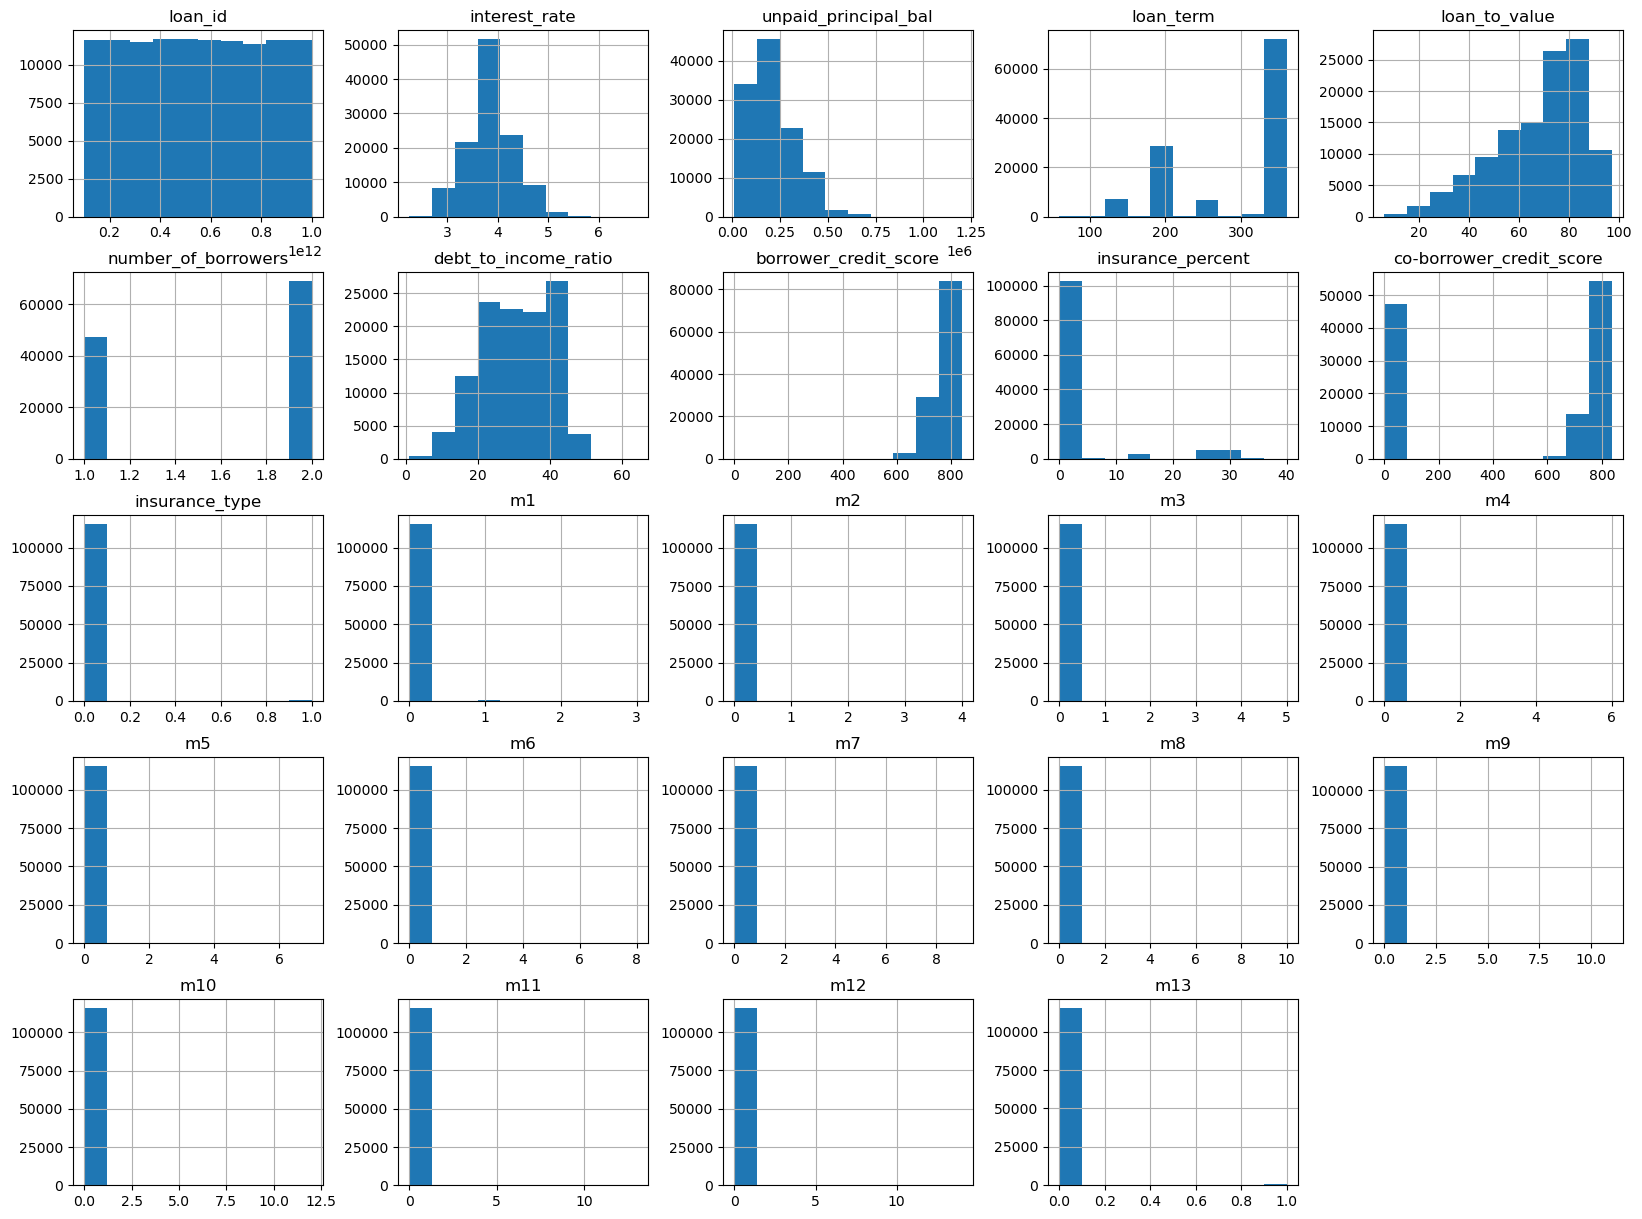

In [16]:
freqgraph =data.select_dtypes(include = ['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2404\1810851330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


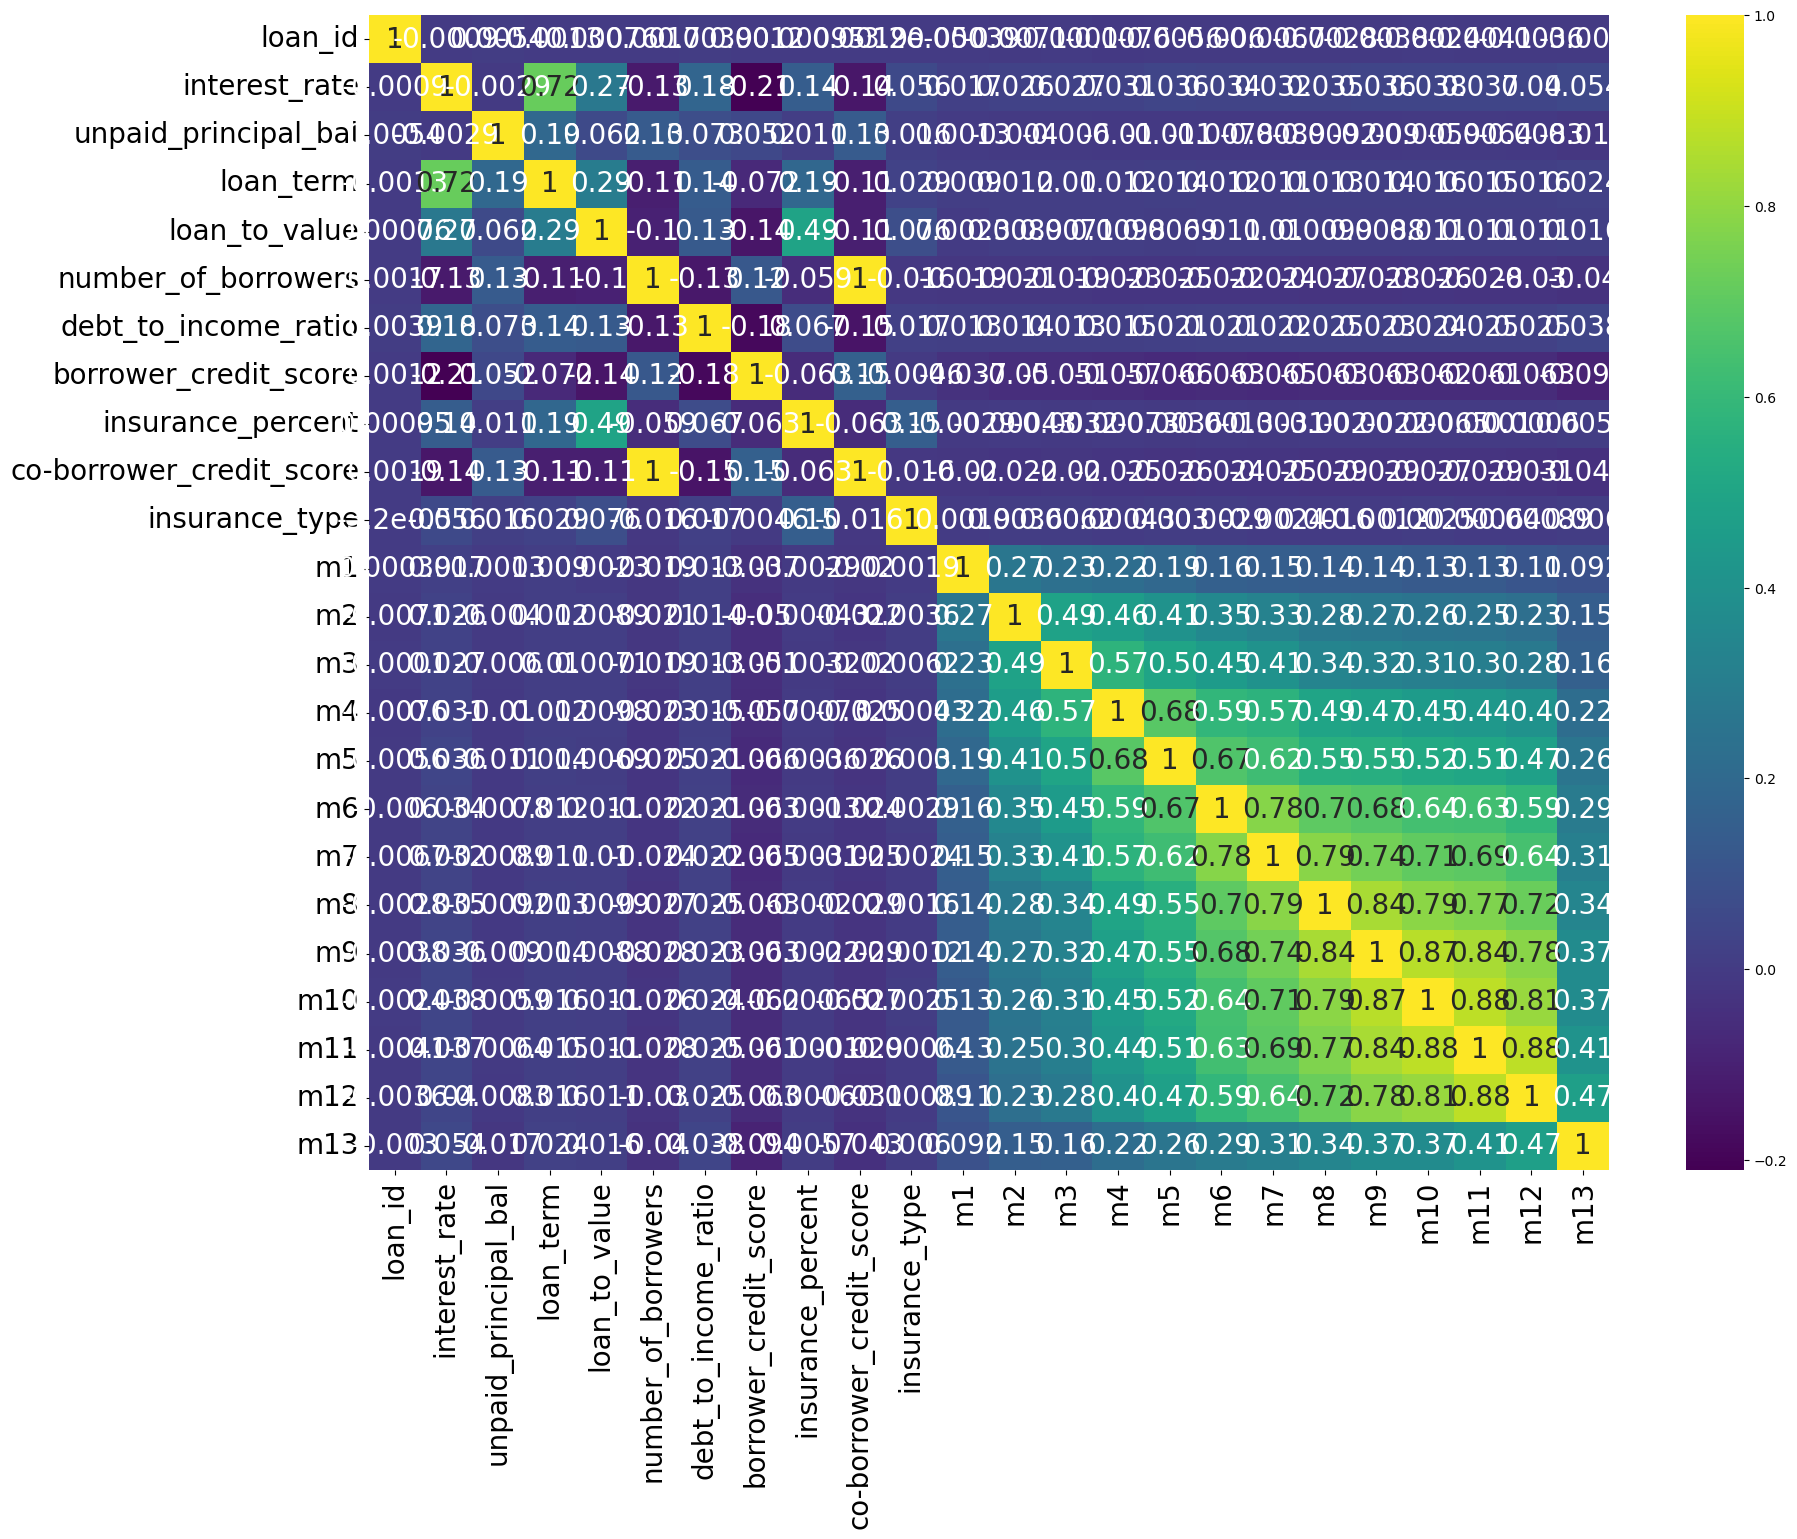

In [17]:
plt.figure(figsize = (20,15))
corr=data.corr()
sns.heatmap(corr,cmap = 'viridis',annot = True, annot_kws = {'size':20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<Axes: xlabel='interest_rate', ylabel='loan_purpose'>

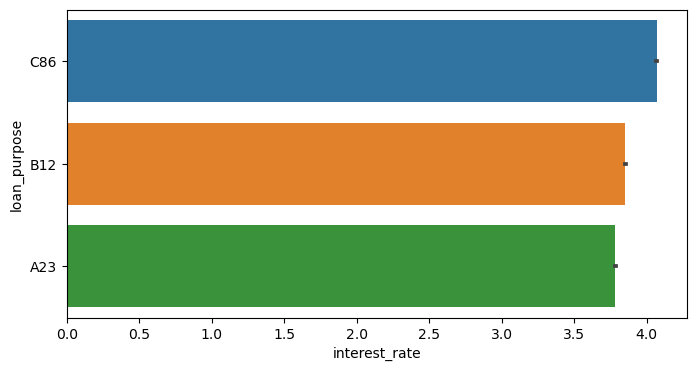

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x=data['interest_rate'],y=data['loan_purpose'])

In [19]:
x=data.drop('loan_id',axis=1)
y=data['loan_id']

In [20]:
data.drop("loan_id",axis=1,inplace=True)

In [21]:
data.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,1


In [22]:
X=data.iloc[:,[4,5]].values

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRmodel=LogisticRegression()
LRmodel=LRmodel.fit(x_train,y_train)

In [32]:
from sklearn.model_selection import KFold

In [33]:
Kfold_validator=KFold(10)

In [34]:
for train_index,test_index in Kfold_validator.split(x,y):
    print('training index:',train_index)
    print("test index:",test_index)

training index: [ 11606  11607  11608 ... 116055 116056 116057]
test index: [    0     1     2 ... 11603 11604 11605]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [11606 11607 11608 ... 23209 23210 23211]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [23212 23213 23214 ... 34815 34816 34817]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [34818 34819 34820 ... 46421 46422 46423]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [46424 46425 46426 ... 58027 58028 58029]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [58030 58031 58032 ... 69633 69634 69635]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [69636 69637 69638 ... 81239 81240 81241]
training index: [     0      1      2 ... 116055 116056 116057]
test index: [81242 81243 81244 ... 92845 92846 92847]
training index: [     0      1      2 ... 116055 116056 

In [39]:
from sklearn.model_selection import cross_val_score

In [44]:
sKFold_validator=StratifiedKFold(n_splits=10)